In [1]:
import pandas as pd

import numpy as np

%matplotlib inline

from datetime import datetime

pd.set_option('display.max_rows', None)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

- We focus on understanding the final data structure
- support each step by visual analytics

## John Hopkins GITHUB csv Data

In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181534,181574,181666,181725,181808,181912,181987,182033,182072,182149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277141,277141,277409,277444,277663,277940,278211,278504,278793,279077
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265968,265971,265975,265985,265993,266006,266015,266025,266030,266038
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [4]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22', '6/22/22',
       '6/23/22', '6/24/22', '6/25/22', '6/26/22'],
      dtype='object', length=887)

In [5]:
time_idx=pd_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/17/22', '6/18/22', '6/19/22', '6/20/22', '6/21/22', '6/22/22',
       '6/23/22', '6/24/22', '6/25/22', '6/26/22'],
      dtype='object', length=887)


In [6]:
df_plot=pd.DataFrame({'date':time_idx})
df_plot.tail()

,date
882,6/22/22
883,6/23/22
884,6/24/22
885,6/25/22
886,6/26/22


In [7]:
len(pd_raw['Country/Region'].unique())

199

In [8]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4:].sum(axis=0)

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            1
1/28/20            4
1/29/20            4
1/30/20            4
1/31/20            5
2/1/20             8
2/2/20            10
2/3/20            12
2/4/20            12
2/5/20            12
2/6/20            12
2/7/20            13
2/8/20            13
2/9/20            14
2/10/20           14
2/11/20           16
2/12/20           16
2/13/20           16
2/14/20           16
2/15/20           16
2/16/20           16
2/17/20           16
2/18/20           16
2/19/20           16
2/20/20           16
2/21/20           16
2/22/20           16
2/23/20           16
2/24/20           16
2/25/20           16
2/26/20           21
2/27/20           26
2/28/20           53
2/29/20           66
3/1/20           117
3/2/20           150
3/3/20           188
3/4/20           240
3/5/20           349
3/6/20           534
3/7/20           684
3/8/20           847
3/9/20       

In [9]:
country_list=["United Kingdom","France","Belgium"]

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))

In [11]:
df_plot

,date,United Kingdom,France,Belgium
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,2,0
3,1/25/20,0,3,0
4,1/26/20,0,3,0
5,1/27/20,0,3,0
6,1/28/20,0,4,0
7,1/29/20,0,5,0
8,1/30/20,0,5,0
9,1/31/20,2,5,0


<AxesSubplot:xlabel='date'>

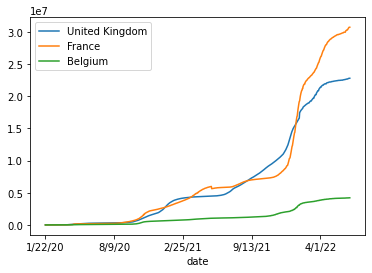

In [12]:
df_plot.set_index('date').plot()


In [13]:
df_plot.head()

,date,United Kingdom,France,Belgium
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,2,0
3,1/25/20,0,3,0
4,1/26/20,0,3,0


In [14]:
type(df_plot.date[0])

str

In [15]:
datetime.strptime(df_plot.date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [16]:
time_idx=[datetime.strptime(each, '%m/%d/%y') for each in df_plot.date] # Convert to Datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # Convert date back to string

In [17]:
time_idx[-5:]

[datetime.datetime(2022, 6, 22, 0, 0),
 datetime.datetime(2022, 6, 23, 0, 0),
 datetime.datetime(2022, 6, 24, 0, 0),
 datetime.datetime(2022, 6, 25, 0, 0),
 datetime.datetime(2022, 6, 26, 0, 0)]

In [18]:
df_plot['date']=time_idx

In [19]:
df_plot.head()

,date,United Kingdom,France,Belgium
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,2,0
3,2020-01-25,0,3,0
4,2020-01-26,0,3,0


In [20]:
df_plot.to_csv('../data/processed/COVID_small_table.csv', sep=';', index=False)

In [21]:
country_population = {"United Kingdom" : 67220000 , "France" : 67390000 , "Belgium" : 11560000 }

In [22]:
relative_cases= df_plot.copy()

In [23]:
for each in country_list:
    relative_cases[each]=relative_cases[each].div(country_population[each]).round(4)

In [24]:
relative_cases

,date,United Kingdom,France,Belgium
0,2020-01-22,0.0000,0.0000,0.0000
1,2020-01-23,0.0000,0.0000,0.0000
2,2020-01-24,0.0000,0.0000,0.0000
3,2020-01-25,0.0000,0.0000,0.0000
4,2020-01-26,0.0000,0.0000,0.0000
5,2020-01-27,0.0000,0.0000,0.0000
6,2020-01-28,0.0000,0.0000,0.0000
7,2020-01-29,0.0000,0.0000,0.0000
8,2020-01-30,0.0000,0.0000,0.0000
9,2020-01-31,0.0000,0.0000,0.0000


<AxesSubplot:xlabel='date'>

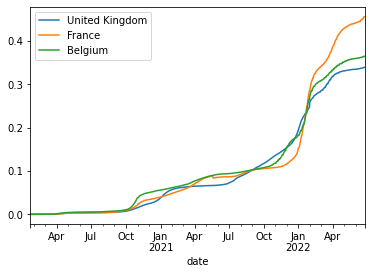

In [25]:
relative_cases.set_index('date').plot()

In [26]:
relative_cases.to_csv('../data/processed/COVID_population_relative_cases.csv', sep=';', index=False)

## Vaccination Data

In [27]:
vacc_path='../data/raw/COVID-19-vacc/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv'
vacc_raw=pd.read_csv(vacc_path)

In [28]:
vacc_raw.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [29]:
vacc_raw=vacc_raw.drop(columns=["Doses_admin","UID","Province_State","Report_Date_String"])

In [30]:
vacc_raw= vacc_raw.fillna(0)

In [31]:
vacc_raw.head()

,Country_Region,Date,People_partially_vaccinated,People_fully_vaccinated
0,Canada,2020-12-14,0.0,0.0
1,World,2020-12-14,0.0,0.0
2,Canada,2020-12-15,0.0,0.0
3,China,2020-12-15,0.0,0.0
4,Russia,2020-12-15,28500.0,0.0


In [32]:
vacc_base=vacc_raw[(vacc_raw['Date']>'2021-01-02')]

In [33]:
vacc_base.head()

,Country_Region,Date,People_partially_vaccinated,People_fully_vaccinated
342,Argentina,2021-01-03,0.0,0.0
343,Austria,2021-01-03,5027.0,0.0
344,Bahrain,2021-01-03,60689.0,0.0
345,Belarus,2021-01-03,0.0,0.0
346,Belgium,2021-01-03,794.0,0.0


In [34]:
vacc_base=vacc_base.groupby(['Date','Country_Region']).sum().reset_index()

In [35]:
vacc_plot=pd.DataFrame({'date':vacc_base['Date'].unique()})

In [36]:
#vacc_plot
# the date 10.05.2021 is missung for most of the countries either drop it or copy the data from the day before to keep the consistency
vacc_plot=vacc_plot.drop(index=127, axis=0) 

In [37]:
country_list=["United Kingdom","France","Belgium"]

In [38]:
vacc_base[vacc_base["Country_Region"]=="Germany"].iloc[:,:]

,Date,Country_Region,People_partially_vaccinated,People_fully_vaccinated
16,2021-01-03,Germany,300551.0,1021.0
58,2021-01-04,Germany,348935.0,1021.0
102,2021-01-05,Germany,402967.0,1046.0
148,2021-01-06,Germany,465821.0,1047.0
195,2021-01-07,Germany,521675.0,1051.0
242,2021-01-08,Germany,584835.0,1369.0
290,2021-01-09,Germany,646163.0,1415.0
340,2021-01-10,Germany,681516.0,1423.0
390,2021-01-11,Germany,749148.0,1471.0
441,2021-01-12,Germany,831883.0,1521.0


In [39]:
for each in country_list:
    vacc_plot[each]=np.array(vacc_base[vacc_base["Country_Region"]==each].iloc[:,3:])

In [40]:
vacc_plot[:]

,date,United Kingdom,France,Belgium
0,2021-01-03,22002.0,0.0,0.0
1,2021-01-04,22002.0,0.0,0.0
2,2021-01-05,22002.0,0.0,0.0
3,2021-01-06,22002.0,0.0,0.0
4,2021-01-07,22002.0,0.0,1.0
5,2021-01-08,22002.0,0.0,1.0
6,2021-01-09,22002.0,0.0,1.0
7,2021-01-10,391399.0,0.0,1.0
8,2021-01-11,412167.0,0.0,1.0
9,2021-01-12,428232.0,0.0,1.0


In [41]:
type(vacc_plot.date[0])

str

In [42]:
vacc_plot["date"] = pd.to_datetime(vacc_plot["date"])

In [43]:
vacc_plot["date"].tail()

534   2022-06-21
535   2022-06-22
536   2022-06-23
537   2022-06-24
538   2022-06-25
Name: date, dtype: datetime64[ns]

<AxesSubplot:xlabel='date'>

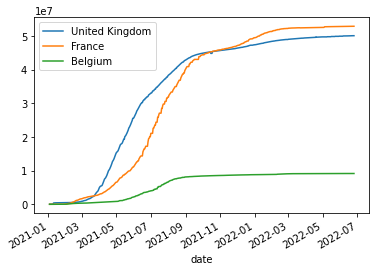

In [44]:
vacc_plot.set_index('date').plot()

In [45]:
vacc_plot.to_csv('../data/processed/Vaccination_small_table.csv', sep=';', index=False)

In [46]:
country_population = {"United Kingdom" : 67220000 , "France" : 67390000 , "Belgium" : 11560000 }

In [47]:
vaccination_rate= vacc_plot.copy()

In [48]:
for each in country_list:
    vaccination_rate[each]=vaccination_rate[each].div(country_population[each]).round(6)*100

In [49]:
vaccination_rate

,date,United Kingdom,France,Belgium
0,2021-01-03,0.0327,0.0000,0.0000
1,2021-01-04,0.0327,0.0000,0.0000
2,2021-01-05,0.0327,0.0000,0.0000
3,2021-01-06,0.0327,0.0000,0.0000
4,2021-01-07,0.0327,0.0000,0.0000
5,2021-01-08,0.0327,0.0000,0.0000
6,2021-01-09,0.0327,0.0000,0.0000
7,2021-01-10,0.5823,0.0000,0.0000
8,2021-01-11,0.6132,0.0000,0.0000
9,2021-01-12,0.6371,0.0000,0.0000


<AxesSubplot:xlabel='date'>

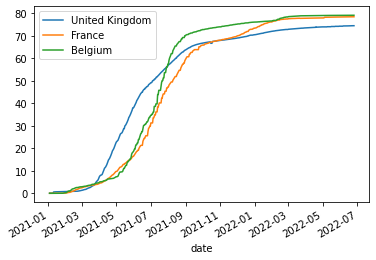

In [50]:
vaccination_rate.set_index('date').plot()

In [51]:
vaccination_rate.to_csv('../data/processed/Vaccination_percentage.csv', sep=';', index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table)

A primary key’s main features are:
- It must contain a unique value for each row of data.
- It can't contain null values.

In [21]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [22]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a string, important for indexing
pd_data_base.head()

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,no,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,no,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,no,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,no,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,no,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [23]:
pd_data_base= pd_data_base.drop(columns=["Lat","Long"])
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,no,Albania,0,0,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,no,Algeria,0,0,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,no,Andorra,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [24]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd.head()

state            no                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   

state    ...      no                                                          \
country  ... Uruguay Uzbekistan Vanuatu Venezuela Vietnam West Bank and Gaza   
1/22/20  ...       0          0       0         0       0                  0   
1/23/20  ...       0          0       0         0       2                  0   
1/24/20  ...       0          0       0         0       2                  0   
1/25/20  ...       0          0       0         0       2                  0   
1/26/20  ...       0          0       0         0       2                  0   

state                                               
country Winter Olympics 2022 Yemen Zambia Zimbabwe  
1/22/20                    0     0      0        0  
1/23/20                    0     0      0        0  
1/24/20                    0     0      0        0  
1/25/20                    0     0      0        0  
1/26/20                    0     0      0        0  

[5 rows x 285 columns]

In [25]:
test_pd.columns

MultiIndex([(                          'no',          'Afghanistan'),
            (                          'no',              'Albania'),
            (                          'no',              'Algeria'),
            (                          'no',              'Andorra'),
            (                          'no',               'Angola'),
            (                          'no',           'Antarctica'),
            (                          'no',  'Antigua and Barbuda'),
            (                          'no',            'Argentina'),
            (                          'no',              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                          'no',              'Uruguay'),
            (                          'no',           'Uzbekistan'),
            (                          'no',              'Vanuatu'),
            (                          'no',            'Venezuela'),
    

In [26]:
pd_relational_model=test_pd.stack(level=[0,1]).reset_index().rename(columns={'level_0':'date',0:'confirmed'},)

In [27]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [28]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [29]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [30]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [31]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';', index=False)

In [32]:
pd_relational_model.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,Anguilla,United Kingdom,0.0
2,2020-01-22,Anhui,China,1.0
3,2020-01-22,Aruba,Netherlands,0.0
4,2020-01-22,Australian Capital Territory,Australia,0.0


In [33]:
pd_relational_model.tail()

,date,state,country,confirmed
250225,2022-06-17,no,West Bank and Gaza,658100.0
250226,2022-06-17,no,Winter Olympics 2022,535.0
250227,2022-06-17,no,Yemen,11823.0
250228,2022-06-17,no,Zambia,324025.0
250229,2022-06-17,no,Zimbabwe,254753.0


In [34]:
pd_relational_model[270:300]

,date,state,country,confirmed
270,2020-01-22,no,US,1.0
271,2020-01-22,no,Uganda,0.0
272,2020-01-22,no,Ukraine,0.0
273,2020-01-22,no,United Arab Emirates,0.0
274,2020-01-22,no,United Kingdom,0.0
275,2020-01-22,no,Uruguay,0.0
276,2020-01-22,no,Uzbekistan,0.0
277,2020-01-22,no,Vanuatu,0.0
278,2020-01-22,no,Venezuela,0.0
279,2020-01-22,no,Vietnam,0.0


## Group-by apply

In [34]:
pd_JH_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0.0
1,2020-01-22,no,Kosovo,0.0
2,2020-01-22,no,Kuwait,0.0
3,2020-01-22,no,Kyrgyzstan,0.0
4,2020-01-22,no,Laos,0.0


In [35]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20') & (pd_JH_data['date']<'2020-04-19')]

In [36]:
test_data

,date,state,country,confirmed
16854,2020-03-21,no,Germany,16662.0
16904,2020-03-21,no,US,26025.0
17139,2020-03-22,no,Germany,18610.0
17203,2020-03-22,no,US,34944.0
17424,2020-03-23,no,Germany,22672.0
17474,2020-03-23,no,US,46096.0
17709,2020-03-24,no,Germany,27436.0
17759,2020-03-24,no,US,56714.0
17994,2020-03-25,no,Germany,31554.0
18058,2020-03-25,no,US,68841.0


In [37]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-04-18,no,137439.0
US,2020-04-18,no,738464.0


In [39]:
# %load ../src/features/build_features.py
import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate
        Parameters:
        ----------
        in_array : pandas.series
        Returns:
        ----------
        Doubling rate: double
    '''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

if __name__ == '__main__':
    test_data_reg=np.array([2,4,6])
    result=get_doubling_time_via_regression(test_data_reg)
    print('the test slope is: '+str(result))


the test slope is: [2.]


In [40]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                       
no    Germany  2020-04-18   137439.0
      US       2020-04-18   738464.0

In [42]:
# this command will only work when adapting the get_doubling_time_via_regression function
test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [41]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result
    

In [42]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  16855          NaN
                17142          NaN
                17424     6.427510
                17709     5.190573
                17993     6.129400
                18279     7.017784
                18564     6.853612
                18849     7.033184
                19135     9.319752
                19419    12.117715
                19704    12.225639
                19990    12.354456
                20274    11.646194
                20559    11.926683
                20844    13.000218
                21129    14.266822
                21414    18.924581
                21699    25.414281
                21985    25.336566
                22270    23.070439
                22554    21.038814
                22839    23.927312
                23124    33.713163
                23409    44.936295
                23695    53.199538
                23979    54.830414
                24264    47.724464
                24549    41.82559

In [43]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [44]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'doubling_rate',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,doubling_rate
0,Alberta,Canada,0,NaN
1,Alberta,Canada,499,NaN
2,Alberta,Canada,762,NaN
3,Alberta,Canada,1069,NaN
4,Alberta,Canada,1333,NaN


In [45]:
pd_JH_data=pd_JH_data.reset_index()

pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0.0
1,1,2020-01-22,no,Kosovo,0.0
2,2,2020-01-22,no,Kuwait,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0
4,4,2020-01-22,no,Laos,0.0


In [46]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','doubling_rate']],on=['index'],how='left')

In [47]:
pd_result_larg[17000:17800]

,index,date,state,country,confirmed,doubling_rate
17000,17000,2020-03-21,British Columbia,Canada,424.0,3.198618
17001,17001,2020-03-21,Curacao,Netherlands,3.0,inf
17002,17002,2020-03-21,"Bonaire, Sint Eustatius and Saba",Netherlands,0.0,NaN
17003,17003,2020-03-21,Beijing,China,504.0,40.972222
17004,17004,2020-03-21,Australian Capital Territory,Australia,9.0,2.533333
17005,17005,2020-03-21,Aruba,Netherlands,5.0,9.333333
17006,17006,2020-03-21,Anhui,China,990.0,inf
17007,17007,2020-03-21,Anguilla,United Kingdom,0.0,NaN
17008,17008,2020-03-21,Alberta,Canada,195.0,4.035088
17009,17009,2020-03-21,Bermuda,United Kingdom,2.0,inf


## Filter the data with groupby apply

In [48]:
from scipy import signal

def savgol_filter(df_input,column='confirmed',window=11):
    ''' Savgol Filter which can be used in groupby apply function 
        it ensures that the data structure is kept'''
    window=11, 
    degree=1
    df_result=df_input
    
    filter_in=df_input[column].fillna(0) # attention with the neutral element here
    
    result=signal.savgol_filter(np.array(filter_in),
                           11, # window size used for filtering
                           1)
    df_result[column+'_filtered']=result
    return df_result

In [49]:
pd_filtered_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [50]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_result[['index','confirmed_filtered']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered
0,0,2020-01-22,Alberta,Canada,0.0,NaN,0.0
1,1,2020-01-22,no,Kosovo,0.0,NaN,0.0
2,2,2020-01-22,no,Kuwait,0.0,NaN,0.0
3,3,2020-01-22,no,Kyrgyzstan,0.0,NaN,0.0
4,4,2020-01-22,no,Laos,0.0,NaN,0.0


## Filtered doubling rate

In [51]:
pd_filtered_doubling=pd_result_larg[['state','country','confirmed_filtered']].groupby(['state','country']).apply(rolling_reg,'confirmed_filtered').reset_index()

pd_filtered_doubling=pd_filtered_doubling.rename(columns={'confirmed_filtered':'confirmed_filtered_DR',
                             'level_2':'index'})

pd_filtered_doubling.tail()

,state,country,index,confirmed_filtered_DR
244810,no,Zimbabwe,243531,1277.565658
244811,no,Zimbabwe,243744,1234.500491
244812,no,Zimbabwe,244051,1235.500491
244813,no,Zimbabwe,244293,1236.500491
244814,no,Zimbabwe,244814,1237.500491


In [52]:
pd_result_larg=pd.merge(pd_result_larg,pd_filtered_doubling[['index','confirmed_filtered_DR']],on=['index'],how='left')
pd_result_larg.tail()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,confirmed_filtered_DR
244810,244810,2022-05-29,no,Andorra,42894.0,inf,4.293791e+04,976.881988
244811,244811,2022-05-29,no,Algeria,265873.0,1.772480e+05,2.658749e+05,84039.919539
244812,244812,2022-05-29,no,Albania,276101.0,1.041799e+04,2.761226e+05,7110.562866
244813,244813,2022-05-29,no,Argentina,9230573.0,3.552109e+02,9.207130e+06,1296.220680
244814,244814,2022-05-29,no,Zimbabwe,252092.0,3.789524e+03,2.521362e+05,1237.500491


In [53]:
mask=pd_result_larg['confirmed']>100
pd_result_larg['confirmed_filtered_DR']=pd_result_larg['confirmed_filtered_DR'].where(mask, other=np.NaN)

In [54]:
pd_result_larg.tail()

,index,date,state,country,confirmed,doubling_rate,confirmed_filtered,confirmed_filtered_DR
244810,244810,2022-05-29,no,Andorra,42894.0,inf,4.293791e+04,976.881988
244811,244811,2022-05-29,no,Algeria,265873.0,1.772480e+05,2.658749e+05,84039.919539
244812,244812,2022-05-29,no,Albania,276101.0,1.041799e+04,2.761226e+05,7110.562866
244813,244813,2022-05-29,no,Argentina,9230573.0,3.552109e+02,9.207130e+06,1296.220680
244814,244814,2022-05-29,no,Zimbabwe,252092.0,3.789524e+03,2.521362e+05,1237.500491


In [55]:
pd_result_larg.to_csv('../data/processed/COVID_final_set.csv',sep=';',index=False)